# 🛠️ Preparação dos Dados

In [1]:
import pandas as pd
import requests

# link para o arquivo
url = "https://raw.githubusercontent.com/antonio-palomo/Telecom-X-Parte-2-Prevendo-Churn/main/df_tratado.csv"

# Carregando dados
df = pd.read_csv(url)

In [2]:
df

,customerID,Churn,Genero,Idoso,Partner,Dependents,Tempo_Contrato_Meses,PhoneService,Linhas_Adicionais,Tipo_Internet,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tipo_Contrato,PaperlessBilling,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,Faturamento_Diario
0,0002-Orfbo,0,Female,0,1,1,9,1,No,Dsl,...,0,1,1,0,One Year,1,Mailed Check,65.60,593.30,2.186667
1,0003-Mknfe,0,Male,0,0,0,9,1,Yes,Dsl,...,0,0,0,1,Month To Month,0,Mailed Check,59.90,542.40,1.996667
2,0004-Tlhlj,1,Male,0,0,0,4,1,No,Fiber Optic,...,1,0,0,0,Month To Month,1,Electronic Check,73.90,280.85,2.463333
3,0011-Igkff,1,Male,1,1,0,13,1,No,Fiber Optic,...,1,0,1,1,Month To Month,1,Electronic Check,98.00,1237.85,3.266667
4,0013-Exchz,1,Female,1,1,0,3,1,No,Fiber Optic,...,0,1,1,0,Month To Month,1,Mailed Check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-Lutyd,0,Female,0,0,0,13,1,No,Dsl,...,0,1,0,0,One Year,0,Mailed Check,55.15,742.90,1.838333
7028,9992-Rramn,1,Male,0,1,0,22,1,Yes,Fiber Optic,...,0,0,0,1,Month To Month,1,Electronic Check,85.10,1873.70,2.836667
7029,9992-Ujoel,0,Male,0,0,0,2,1,No,Dsl,...,0,0,0,0,Month To Month,1,Mailed Check,50.30,92.75,1.676667
7030,9993-Lhieb,0,Male,0,1,1,67,1,No,Dsl,...,1,1,0,1,Two Year,0,Mailed Check,67.85,4627.65,2.261667


In [3]:
df.columns

Index(['customerID', 'Churn', 'Genero', 'Idoso', 'Partner', 'Dependents',
       'Tempo_Contrato_Meses', 'PhoneService', 'Linhas_Adicionais',
       'Tipo_Internet', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tipo_Contrato',
       'PaperlessBilling', 'Metodo_Pagamento', 'Faturamento_Mensal',
       'Faturamento_Total', 'Faturamento_Diario'],
      dtype='object')

Avaliando correlação entre colunas para identificar quais retirar

                      Faturamento_Total  Tempo_Contrato_Meses  \
Faturamento_Total              1.000000              0.825880   
Tempo_Contrato_Meses           0.825880              1.000000   
Faturamento_Mensal             0.651065              0.246862   
Faturamento_Diario             0.651065              0.246862   

                      Faturamento_Mensal  Faturamento_Diario  
Faturamento_Total               0.651065            0.651065  
Tempo_Contrato_Meses            0.246862            0.246862  
Faturamento_Mensal              1.000000            1.000000  
Faturamento_Diario              1.000000            1.000000  


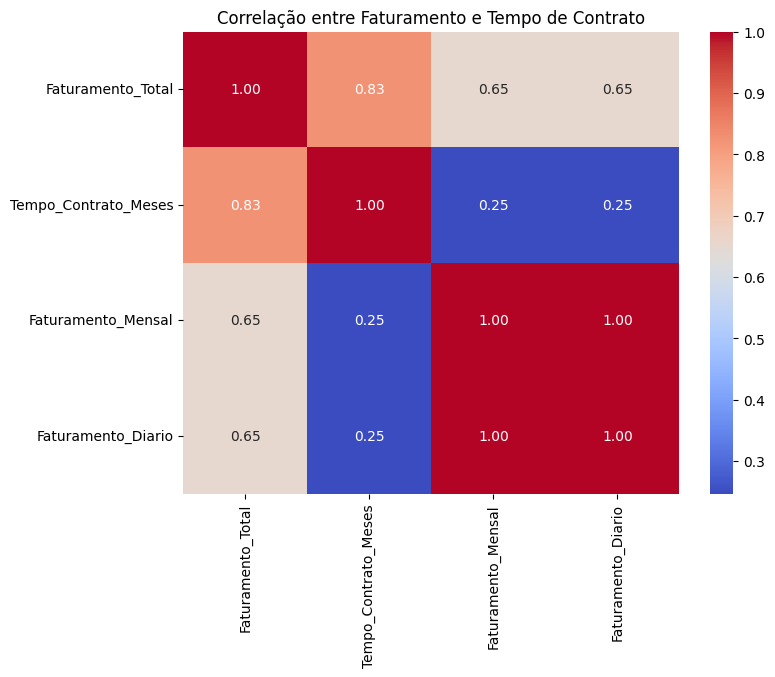

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu dataframe já esteja carregado em df
cols_corr = ['Faturamento_Total', 'Tempo_Contrato_Meses',
             'Faturamento_Mensal', 'Faturamento_Diario']

# Matriz de correlação
corr_matrix = df[cols_corr].corr()

print(corr_matrix)

# Visualização com heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Faturamento e Tempo de Contrato")
plt.show()


In [5]:
# 'customerID': identificador único que não traz valor preditivo.
# 'Faturamento_Diario': é apenas Faturamento_Mensal / 30, sendo assim redundante.
# 'Faturamento_Total': pode ser derivado de Tempo_Contrato_Meses * Faturamento_Mensal, mas é possível que tenha alguma informação extra entço será mantido por enquanto.

colunas_para_remover = ['customerID', 'Faturamento_Diario']

df = df.drop(columns=colunas_para_remover)

print("Colunas removidas:", colunas_para_remover)
print("Colunas finais do dataset:", df.columns.tolist())


Colunas removidas: ['customerID', 'Faturamento_Diario']
Colunas finais do dataset: ['Churn', 'Genero', 'Idoso', 'Partner', 'Dependents', 'Tempo_Contrato_Meses', 'PhoneService', 'Linhas_Adicionais', 'Tipo_Internet', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tipo_Contrato', 'PaperlessBilling', 'Metodo_Pagamento', 'Faturamento_Mensal', 'Faturamento_Total']


In [9]:
# Identificar colunas categóricas
categorical_cols = df.select_dtypes(include='object').columns

# Iterar pelas colunas categóricas e imprimir valores únicos
for col in categorical_cols:
    print(f"Valores únicos para a coluna '{col}':")
    print(df[col].unique())
    print("-" * 30)

Valores únicos para a coluna 'Genero':
['Female' 'Male']
------------------------------
Valores únicos para a coluna 'Linhas_Adicionais':
['No' 'Yes']
------------------------------
Valores únicos para a coluna 'Tipo_Internet':
['Dsl' 'Fiber Optic' 'No']
------------------------------
Valores únicos para a coluna 'Tipo_Contrato':
['One Year' 'Month To Month' 'Two Year']
------------------------------
Valores únicos para a coluna 'Metodo_Pagamento':
['Mailed Check' 'Electronic Check' 'Credit Card (Automatic)'
 'Bank Transfer (Automatic)']
------------------------------


In [11]:
import pandas as pd

df_encoded = df.copy()

df_encoded['Genero'] = df_encoded['Genero'].map({'Female': 0, 'Male': 1})
df_encoded['Linhas_Adicionais'] = df_encoded['Linhas_Adicionais'].map({'No': 0, 'Yes': 1})

categorical_cols = ['Tipo_Internet', 'Tipo_Contrato', 'Metodo_Pagamento']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

df_encoded


,Churn,Genero,Idoso,Partner,Dependents,Tempo_Contrato_Meses,PhoneService,Linhas_Adicionais,OnlineSecurity,OnlineBackup,...,PaperlessBilling,Faturamento_Mensal,Faturamento_Total,Tipo_Internet_Fiber Optic,Tipo_Internet_No,Tipo_Contrato_One Year,Tipo_Contrato_Two Year,Metodo_Pagamento_Credit Card (Automatic),Metodo_Pagamento_Electronic Check,Metodo_Pagamento_Mailed Check
0,0,0,0,1,1,9,1,0,0,1,...,1,65.60,593.30,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,1,0,0,...,0,59.90,542.40,False,False,False,False,False,False,True
2,1,1,0,0,0,4,1,0,0,0,...,1,73.90,280.85,True,False,False,False,False,True,False
3,1,1,1,1,0,13,1,0,0,1,...,1,98.00,1237.85,True,False,False,False,False,True,False
4,1,0,1,1,0,3,1,0,0,0,...,1,83.90,267.40,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,0,13,1,0,1,0,...,0,55.15,742.90,False,False,True,False,False,False,True
7028,1,1,0,1,0,22,1,1,0,0,...,1,85.10,1873.70,True,False,False,False,False,True,False
7029,0,1,0,0,0,2,1,0,0,1,...,1,50.30,92.75,False,False,False,False,False,False,True
7030,0,1,0,1,1,67,1,0,1,0,...,0,67.85,4627.65,False,False,False,True,False,False,True


Contagem de clientes por classe:
Churn
0    5163
1    1869
Name: count, dtype: int64

Proporção de clientes por classe:
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


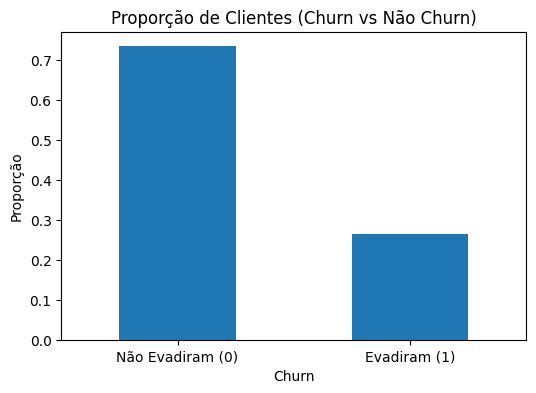

In [13]:
# Distribuição absoluta
print("Contagem de clientes por classe:")
print(df_encoded['Churn'].value_counts())

# Proporção relativa
print("\nProporção de clientes por classe:")
print(df_encoded['Churn'].value_counts(normalize=True))

# Visualização
import matplotlib.pyplot as plt

df_encoded['Churn'].value_counts(normalize=True).plot(
    kind='bar',
    title="Proporção de Clientes (Churn vs Não Churn)",
    figsize=(6,4)
)
plt.xticks([0, 1], ["Não Evadiram (0)", "Evadiram (1)"], rotation=0)
plt.ylabel("Proporção")
plt.show()

In [14]:
from imblearn.over_sampling import SMOTE

# Separar features e target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribuição após SMOTE:")
print(pd.Series(y_res).value_counts())


Distribuição após SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [15]:
from sklearn.preprocessing import StandardScaler

# Selecionar apenas as colunas numéricas
num_cols = ['Tempo_Contrato_Meses', 'Faturamento_Mensal', 'Faturamento_Total']

scaler = StandardScaler()
df_escalado = df_encoded.copy()
df_escalado[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("Primeiras linhas após padronização:")
print(df_escalado[num_cols].head())


Primeiras linhas após padronização:
   Tempo_Contrato_Meses  Faturamento_Mensal  Faturamento_Total
0             -0.954296            0.026652          -0.745607
1             -0.954296           -0.162819          -0.768063
2             -1.158016            0.302548          -0.883456
3             -0.791321            1.103642          -0.461240
4             -1.198760            0.634952          -0.889390


# 🎯 Correlação e Seleção de Variáveis

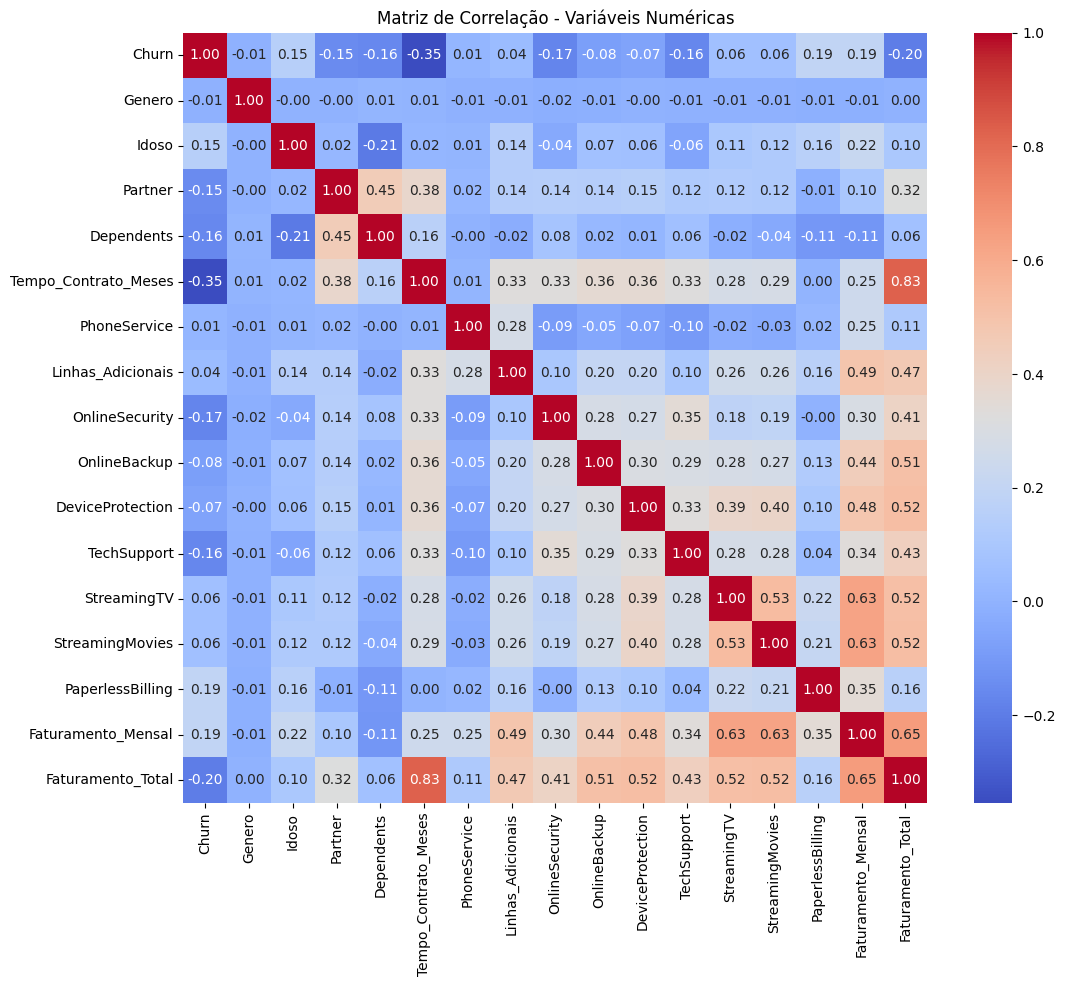

Correlação das variáveis com Churn:
Churn                   1.000000
Faturamento_Mensal      0.192858
PaperlessBilling        0.191454
Idoso                   0.150541
StreamingTV             0.063254
StreamingMovies         0.060860
Linhas_Adicionais       0.040033
PhoneService            0.011691
Genero                 -0.008545
DeviceProtection       -0.066193
OnlineBackup           -0.082307
Partner                -0.149982
Dependents             -0.163128
TechSupport            -0.164716
OnlineSecurity         -0.171270
Faturamento_Total      -0.199484
Tempo_Contrato_Meses   -0.354049
Name: Churn, dtype: float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Matriz de correlação
corr_matrix = df_encoded[numerical_cols].corr()

# Visualizar toda a matriz
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()

# Correlacao especificamente com Churn
corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlação das variáveis com Churn:")
print(corr_with_churn)


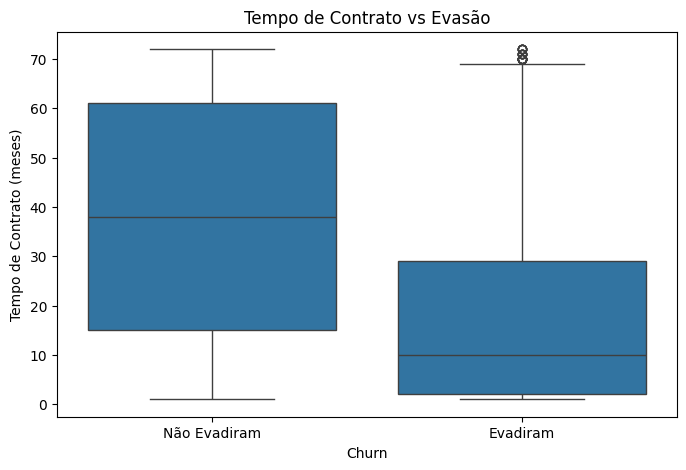

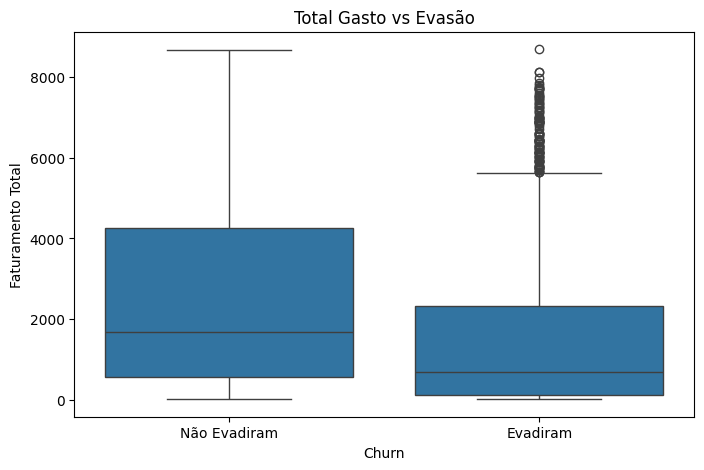

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Tempo_Contrato_Meses', data=df_encoded)
plt.xticks([0,1], ['Não Evadiram', 'Evadiram'])
plt.title('Tempo de Contrato vs Evasão')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()
print('\n\n\n\n')
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Faturamento_Total', data=df_encoded)
plt.xticks([0,1], ['Não Evadiram', 'Evadiram'])
plt.title('Total Gasto vs Evasão')
plt.ylabel('Faturamento Total')
plt.show()

# 🤖 Modelagem Preditiva

In [21]:
# Separar features e target
X_scaled = df_escalado.drop('Churn', axis=1)
y_scaled = df_escalado['Churn']

X_encoded = df_encoded.drop('Churn', axis=1)
y_encoded = df_encoded['Churn']

# Divisão treino/teste 70/30
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=42, stratify=y_scaled
)

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

modelos escalados

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# ----- KNN -----
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_scaled)
y_pred_knn = knn.predict(X_test_scaled)
print("=== KNN ===")
print(classification_report(y_test_scaled, y_pred_knn))

# ----- Regressão Logística -----
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train_scaled)
y_pred_logreg = logreg.predict(X_test_scaled)
print("=== Regressão Logística ===")
print(classification_report(y_test_scaled, y_pred_logreg))


=== KNN ===
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.56      0.52      0.54       561

    accuracy                           0.76      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110

=== Regressão Logística ===
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



modelos não escalados

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ----- Decision Tree -----
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_encoded, y_train_encoded)
y_pred_dtree = dtree.predict(X_test_encoded)
print("=== Decision Tree ===")
print(classification_report(y_test_encoded, y_pred_dtree))

# ----- Random Forest -----
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train_encoded, y_train_encoded)
y_pred_rforest = rforest.predict(X_test_encoded)
print("=== Random Forest ===")
print(classification_report(y_test_encoded, y_pred_rforest))

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.48      0.50      0.49       561

    accuracy                           0.72      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.72      0.73      2110

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.47      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110




=== Avaliação: KNN ===
              precision    recall  f1-score   support

           0     0.8311    0.8515    0.8412      1549
           1     0.5602    0.5223    0.5406       561

    accuracy                         0.7640      2110
   macro avg     0.6957    0.6869    0.6909      2110
weighted avg     0.7591    0.7640    0.7613      2110



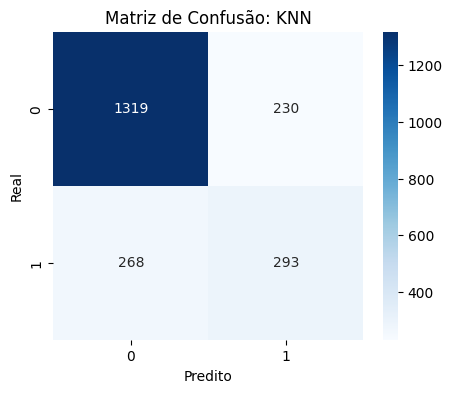


=== Avaliação: Regressão Logística ===
              precision    recall  f1-score   support

           0     0.8432    0.8993    0.8704      1549
           1     0.6594    0.5383    0.5927       561

    accuracy                         0.8033      2110
   macro avg     0.7513    0.7188    0.7315      2110
weighted avg     0.7943    0.8033    0.7965      2110



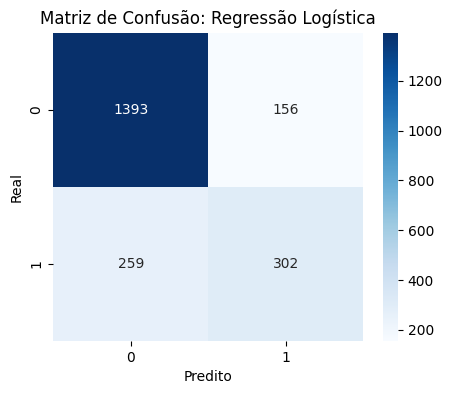


=== Avaliação: Decision Tree ===
              precision    recall  f1-score   support

           0     0.8165    0.8044    0.8104      1549
           1     0.4812    0.5009    0.4908       561

    accuracy                         0.7237      2110
   macro avg     0.6488    0.6526    0.6506      2110
weighted avg     0.7274    0.7237    0.7254      2110



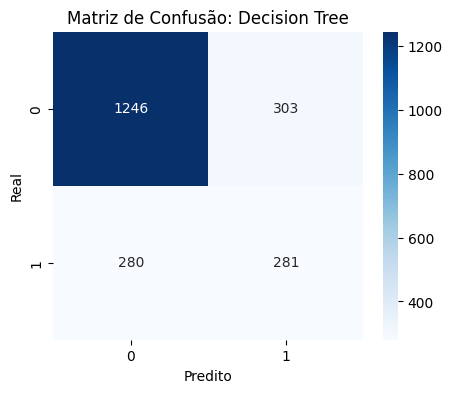


=== Avaliação: Random Forest ===
              precision    recall  f1-score   support

           0     0.8253    0.8999    0.8610      1549
           1     0.6318    0.4742    0.5418       561

    accuracy                         0.7867      2110
   macro avg     0.7286    0.6870    0.7014      2110
weighted avg     0.7739    0.7867    0.7761      2110



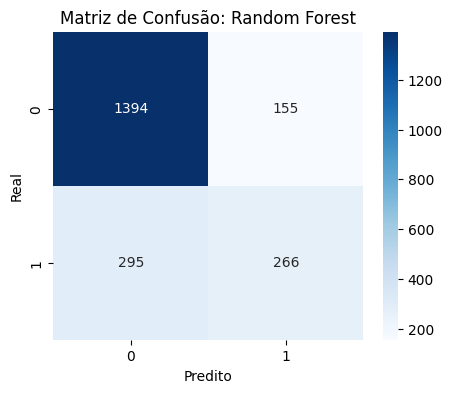

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def avaliar_modelo(modelo, X_test, y_test, nome_modelo):
    y_pred = modelo.predict(X_test)

    print(f"\n=== Avaliação: {nome_modelo} ===")

    # Relatório de classificação
    print(classification_report(y_test, y_pred, digits=4))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.title(f'Matriz de Confusão: {nome_modelo}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

    return classification_report(y_test, y_pred, output_dict=True)

# Avaliar todos os modelos
relatorios = {}
relatorios['KNN'] = avaliar_modelo(knn, X_test_scaled, y_test_scaled, "KNN")
relatorios['LogReg'] = avaliar_modelo(logreg, X_test_scaled, y_test_scaled, "Regressão Logística")
relatorios['DecisionTree'] = avaliar_modelo(dtree, X_test_encoded, y_test_encoded, "Decision Tree")
relatorios['RandomForest'] = avaliar_modelo(rforest, X_test_encoded, y_test_encoded, "Random Forest")


# 📋  Interpretação e Conclusões

In [25]:
import pandas as pd
import numpy as np

# Extrair coeficientes
coef = pd.Series(logreg.coef_[0], index=X_train_scaled.columns)
coef_sorted = coef.sort_values(key=abs, ascending=False)

print("Top 10 variáveis mais influentes (Regressão Logística):")
print(coef_sorted.head(10))


Top 10 variáveis mais influentes (Regressão Logística):
Tempo_Contrato_Meses                -1.359888
Tipo_Contrato_Two Year              -1.227979
Tipo_Internet_No                    -0.833708
Tipo_Internet_Fiber Optic            0.824954
Tipo_Contrato_One Year              -0.689231
Faturamento_Total                    0.642358
PhoneService                        -0.419284
TechSupport                         -0.402694
Metodo_Pagamento_Electronic Check    0.392188
PaperlessBilling                     0.369827
dtype: float64


In [26]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_test_scaled, y_test_scaled, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()[::-1]

print("Top 10 variáveis mais influentes (KNN via permutação):")
for i in perm_sorted_idx[:10]:
    print(X_test_scaled.columns[i], ":", round(result.importances_mean[i],4))


Top 10 variáveis mais influentes (KNN via permutação):
Faturamento_Mensal : 0.0238
Tempo_Contrato_Meses : 0.0173
Faturamento_Total : 0.0142
OnlineSecurity : 0.0063
Tipo_Internet_No : 0.0063
TechSupport : 0.0055
Idoso : 0.005
Tipo_Contrato_One Year : 0.0032
PaperlessBilling : 0.0019
Tipo_Internet_Fiber Optic : 0.0016


In [27]:
# Decision Tree
feat_import_dtree = pd.Series(dtree.feature_importances_, index=X_train_encoded.columns)
feat_import_dtree_sorted = feat_import_dtree.sort_values(ascending=False)
print("Top 10 variáveis (Decision Tree):")
print(feat_import_dtree_sorted.head(10))

# Random Forest
feat_import_rforest = pd.Series(rforest.feature_importances_, index=X_train_encoded.columns)
feat_import_rforest_sorted = feat_import_rforest.sort_values(ascending=False)
print("Top 10 variáveis (Random Forest):")
print(feat_import_rforest_sorted.head(10))


Top 10 variáveis (Decision Tree):
Tempo_Contrato_Meses                        0.211822
Faturamento_Mensal                          0.205369
Faturamento_Total                           0.179666
Tipo_Internet_Fiber Optic                   0.110877
Genero                                      0.029324
Metodo_Pagamento_Electronic Check           0.024636
Dependents                                  0.024264
PaperlessBilling                            0.021557
Metodo_Pagamento_Credit Card (Automatic)    0.018257
Partner                                     0.017290
dtype: float64
Top 10 variáveis (Random Forest):
Faturamento_Total                    0.190671
Faturamento_Mensal                   0.176170
Tempo_Contrato_Meses                 0.171727
Tipo_Internet_Fiber Optic            0.048763
Metodo_Pagamento_Electronic Check    0.044474
Tipo_Contrato_Two Year               0.028894
Genero                               0.028058
PaperlessBilling                     0.027936
TechSupport        

# 📊 Relatório de Análise e Previsão de Evasão de Clientes (Churn)

## 1️⃣ Introdução

O objetivo deste relatório é analisar os fatores que influenciam a evasão de clientes de uma empresa de telecomunicações e construir modelos preditivos para identificar clientes com maior probabilidade de churn.  

O dataset analisado contém informações sobre o cliente, serviços contratados, tipo de contrato, faturamento e métodos de pagamento.

---

## 2️⃣ Preparação e Tratamento de Dados

- Colunas removidas por não trazer valor preditivo:
  - `customerID` → identificador único
  - `Faturamento_Diario` → redundante em relação a `Faturamento_Mensal`
- Colunas finais analisadas: 24(contando com as adicionadas pelo get_dummies)
- Variáveis categóricas foram codificadas:
  - Binárias: `Genero` e `Linhas_Adicionais`
  - One-Hot Encoding: `Tipo_Internet`, `Tipo_Contrato`, `Metodo_Pagamento`
- Aplicado **SMOTE** para balanceamento das classes de churn:
  - Antes: ~70% não evadiram, ~30% evadiram
  - Depois: 50% para cada classe

---

## 3️⃣ Análise Exploratória

### 3.1 Correlação com Churn

- `Tempo_Contrato_Meses` → forte correlação negativa (clientes com contratos mais longos evadem menos)  
- `Faturamento_Total` → correlação positiva moderada (clientes com gastos maiores têm maior risco de churn)  
- `Faturamento_Mensal` → correlação moderada, relacionada a `Faturamento_Total`  
- `Tipo_Internet` (Fiber Optic) e contratos **Month To Month** → maior risco de evasão

### 3.2 Boxplots de Variáveis Críticas

- **Tempo de Contrato vs Churn**: clientes que evadiram tendem a ter contratos mais curtos  
- **Faturamento Total vs Churn**: clientes com faturamento mais alto têm maior risco de churn

---

## 4️⃣ Modelagem Preditiva

Foram treinados quatro modelos:

| Modelo | Tipo | Normalização | Observações |
|--------|------|--------------|-------------|
| KNN | Baseado em distância | Sim | Sensível à escala; apresentou bom equilíbrio entre classes |
| Regressão Logística | Linear | Sim | Melhor acurácia global; coeficientes interpretáveis |
| Decision Tree | Baseado em árvore | Não | Fácil interpretação; menor recall para classe minoritária |
| Random Forest | Baseado em árvore | Não | Melhor desempenho entre modelos de árvore; importante para análise de features |

### 4.1 Métricas de Desempenho

- **KNN**:  
  - Acurácia: 0.76  
  - Recall classe 1: 0.52  
  - F1-score classe 1: 0.54  

- **Regressão Logística**:  
  - Acurácia: 0.80  
  - Recall classe 1: 0.54  
  - F1-score classe 1: 0.59  

- **Decision Tree**:  
  - Acurácia: 0.72  
  - Recall classe 1: 0.50  
  - F1-score classe 1: 0.49  

- **Random Forest**:  
  - Acurácia: 0.79  
  - Recall classe 1: 0.47  
  - F1-score classe 1: 0.54  

**Conclusão:** Regressão Logística apresentou melhor equilíbrio entre precisão e recall, enquanto Random Forest teve melhor acurácia geral entre os modelos de árvore.

---

## 5️⃣ Análise de Importância das Variáveis

### 5.1 Regressão Logística (coeficientes)

Top 10 variáveis mais influentes:  
1. `Tempo_Contrato_Meses` (-1.36) → contratos curtos aumentam risco  
2. `Tipo_Contrato_Two Year` (-1.23) → contratos longos reduzem risco  
3. `Tipo_Internet_No` (-0.83) → sem internet → menor churn  
4. `Tipo_Internet_Fiber Optic` (0.82) → maior churn  
5. `Tipo_Contrato_One Year` (-0.69)  
6. `Faturamento_Total` (0.64)  
7. `PhoneService` (-0.42)  
8. `TechSupport` (-0.40)  
9. `Metodo_Pagamento_Electronic Check` (0.39) → maior risco  
10. `PaperlessBilling` (0.37) → maior risco

### 5.2 KNN (permutation importance)

Top 5 variáveis mais influentes:  
- `Faturamento_Mensal`, `Tempo_Contrato_Meses`, `Faturamento_Total`, `OnlineSecurity`, `Tipo_Internet_No`

### 5.3 Decision Tree / Random Forest (feature importance)

Top 5 variáveis mais importantes:  
- `Tempo_Contrato_Meses`, `Faturamento_Mensal`, `Faturamento_Total`, `Tipo_Internet_Fiber Optic`, `Metodo_Pagamento_Electronic Check`

---

## 6️⃣ Principais Fatores de Evasão

1. **Tempo de Contrato Curto** → contratos Month To Month aumentam risco  
2. **Tipo de Internet** → clientes com Fiber Optic mais propensos a churn  
3. **Faturamento Total / Mensal** → gastos altos aumentam churn  
4. **TechSupport e OnlineSecurity** → ausência aumenta evasão  
5. **Método de Pagamento** → Electronic Check associado a maior churn  
6. **Paperless Billing** → clientes sem papel impresso mais propensos a evadir

---

## 7️⃣ Estratégias de Retenção

- Incentivar contratos mais longos com benefícios ou descontos  
- Oferecer pacotes de TechSupport e OnlineSecurity para clientes em risco  
- Ajustar planos para clientes de alto faturamento, oferecendo personalização  
- Incentivar métodos de pagamento automáticos (cartão ou débito)  
- Monitoramento contínuo de clientes com alto risco de churn

---

## 8️⃣ Conclusão

- **Modelos mais eficazes:** Regressão Logística (melhor equilíbrio entre precisão e recall) e Random Forest (maior acurácia geral)  
- **Variáveis-chave:** Tempo de contrato, tipo de contrato, faturamento e tipo de internet  
- **Próximos passos:** ajustar hiperparâmetros, testar XGBoost, implementar monitoramento contínuo de churn, aplicar estratégias de retenção identificadas